In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,recall_score,precision_score

### The data given in the assignment 

In [2]:
X = [[-2,1],[-2,-1],[-1,-1.5],[1,1],[1.5,-0.5],[2,-2]]
y = [1,-1,-1,1,1,-1]

### Checking whether the shape is the same

In [3]:
len(X)==len(y)

True

In [4]:
svm_model = SVC(kernel='linear')

In [5]:
svm_model.fit(X,y)

SVC(kernel='linear')

#### If the support vectors are (1.5, -0.5) and (2,-2)

<b>Ans:</b>

(1.5,-0.5) is predicted to be class 1

(2,-2) is predicted to be class -1


In [6]:
svm_model.predict([[1.5,-0.5]])

array([1])

In [7]:
svm_model.predict([[2,-2]])

array([-1])

## Manual calculation
lets add bias to 1

support vector 1 = [1.5,-0.5,1] [2,-2,1] = 1
support vector 2 = [2,-2,1] = -1

<img src="manualweight.jpg">

# Our weights are -0.338 and 0.859
# Our Bias is -0.052

<img src="image.png">

# Create a SVM-model and plot a 2D-SVM classification by using Python and colon data set
(use only two genes, T62947 and H64807), and find your best hyperparameter for precision,
recall, and accuracy. (Training:Testing = 80:20)

## Creating a function to visulize 2D SVM 

In [8]:
# This function is from https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html


def plot_svm_boundary(model,X,y):
    
    # for convenience, I have custom edit it by adding these 2 line so the function can run automatically as it fit by itself
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train,y_train)
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [9]:
colondf = pd.read_csv('colon.csv')

## Data exploration

In [10]:
colondf.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75,1
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13,1
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50,1
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07,1
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62,1


checking for missing data: 
<b>No missing data</b>

In [11]:
colondf.isna().sum().sum()

0

In [12]:
X = colondf[['T62947','H64807']]
y = colondf['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

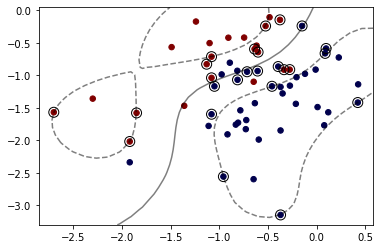

In [13]:
plot_svm_boundary(SVC(), X,y)

# lets use gridsearchcv to find the best hyperparameter for precision, recall and accuarcy

In [14]:
param_grid = {'C':[0.001,0.01,0.1,10,25,30,50,100,1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma' : ['scale', 'auto'],'gamma':[0.001,0.1,1,10]}
gridmodel = GridSearchCV(SVC(),param_grid=param_grid)
gridmodel.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 25, 30, 50, 100, 1000],
                         'gamma': [0.001, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

### The hyperparameter that are chosen by the gridsearch are the following below

In [15]:
gridmodel.best_params_

{'C': 25, 'gamma': 0.1, 'kernel': 'rbf'}

# Use the model to predict X test to get y_pred

In [16]:
y_pred = gridmodel.predict(X_test)

## Evaluation

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.62      0.71         8
           1       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13



<b>Explanation</b>: The best precision is 0.57 and recall is 0.8 with f1 score 0.67. The model able to predict 5 out of 8 correctly for class -1 and predict 4 out of 5 correctly for class 1 in the confusion matrix below

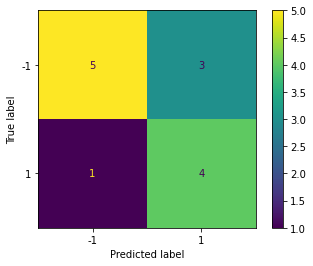

In [18]:
plot_confusion_matrix(gridmodel,X_test,y_test)

# All features

In [19]:
param_grid = {'C':[0.001,0.01,0.1,10,25,30,50,100,1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma' : ['scale', 'auto'],'gamma':[0.001,0.1,1,10]}
df = pd.read_csv('colon.csv')
X = df.drop('Class',axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gridsvm = GridSearchCV(SVC(),param_grid=param_grid)
gridsvm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 25, 30, 50, 100, 1000],
                         'gamma': [0.001, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

### The hyperparameter that are chosen by the gridsearch are the following below

In [20]:
gridsvm.best_params_

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}

# Evaluation

In [21]:
y_pred = gridsvm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.88      0.93         8
           1       0.83      1.00      0.91         5

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13



<b>Explanation:</b> This model has performed a lot better than the previous model with only 2 features since this model used all features it perform with perfect recall of 1 and precision of 0.83 making the average harmony score f1 closer to 1(0.91 in this model). The model got an accuarcy of 0.92, it able to predict 7 out of 8 of true positive cases correctly and fully able to predict 5 out of 5 case of true positive correctly.

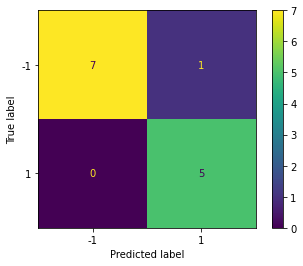

In [22]:
plot_confusion_matrix(gridsvm, X_test,y_test)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,recall_score,precision_score
scaler = StandardScaler()

In [24]:
df = pd.read_csv('colon.csv')
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### It a good practice to do feature scaling or standarization for knn to bring all of it to a common scale

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Lets create a function from scratch that use Elbow Method for seeing how each K neighbor does and return a elbow method graph and best output with confusion matrix

for function explanation please read the comment for step by step explanation

In [26]:
def elbowevaluation(k,weight):
    error_rate = [] # blank list for appending error rate
    for i in k: # loop to run 
        knn = KNeighborsClassifier(n_neighbors=i,weights = weight) # create model knn and assign it hyperparameter such as weight & neighbor
        knn.fit(X_train,y_train)# fit into model
        y_pred = knn.predict(X_test) # use model to predict y_pred from x_test
        error_rate.append(1-accuracy_score(y_test,y_pred)) # append error rate formula 1- accuracy
    plt.plot(k,error_rate)# plot the elbow graph
    plt.title('Elbow graph') # title 
    plt.xlabel('number of neighbor')# x label
    plt.ylabel('error rate') # y label
    plt.show()
    best_k = k[np.argmin(error_rate)] # argmin give out the index of the min item
    print(f'Best K values for weight = {weight} is K = {best_k}') 
    print(f'The following confusion matrix below is contructed by the k = {best_k}')
    bestknn = KNeighborsClassifier(n_neighbors=best_k,weights = weight).fit(X_train,y_train) # create instance set as best hyperparameter and fit it
    y_pred = bestknn.predict(X_test)
    print(f'Recall: {recall_score(y_test,y_pred)}','\nPrecision:',precision_score(y_test,y_pred))
    plot_confusion_matrix(bestknn,X_test, y_test) # plot the confusion matrix with the best hyperparameter

# Question B1 with weight as Distance

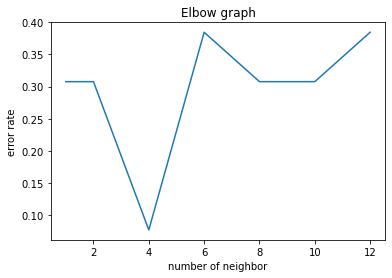

Best K values for weight = distance is K = 4
The following confusion matrix below is contructed by the k = 4
Recall: 1.0 
Precision: 0.8333333333333334


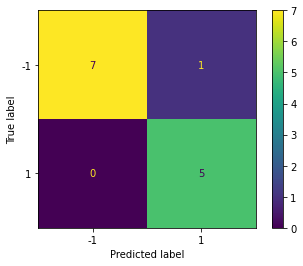

In [27]:
k = [ 1, 2, 4, 6, 8, 10, 12 ]
elbowevaluation(k, 'distance')

# # Question B2 with weight as 

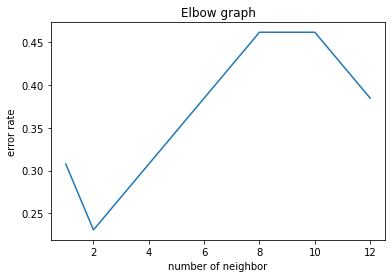

Best K values for weight = uniform is K = 2
The following confusion matrix below is contructed by the k = 2
Recall: 0.4 
Precision: 1.0


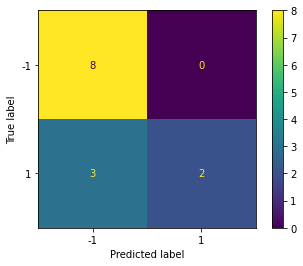

In [28]:
elbowevaluation(k, 'uniform')

# Explanation for comparison between weights = uniform and weights  = distance

## The best weights for cancer classification with collon.csv will be weight = distance

<b>Explanation: </b><p>The model that `weight = distance`, best hypermeter is `k = 4` gave out a recall of `1.0` or perfect recall as task such as patient screening is focus on recall than precision since predicting a sick people as healthy people mean the sick people or maybe with danger disease such as covid passed our screening this may lead to more infection within the country or area as we let the disease people pass. As high recall mean low false negative, false negative in this case mean model predicting cancer as healthy but high precision mean low false positive, false positive in this case means predicting healthy as cancer. in this case, the patient will be panic but further investment will be taken with patient wasted their time but in the end healthy so in cancer screening we focus on recall this is why I have choosen `weight= distance`</p>  